# TCS_Stock_Analysis

## Importing library
!pip install nsepy

In [1]:
#importing library
import pandas as pd #data manipulation and analysis
import numpy as np #mathematical operations
import matplotlib.pyplot as plt #visualizations
#display plot in same notebook
%matplotlib inline   
import seaborn as sns #visualizations
from sklearn.preprocessing import MinMaxScaler #scaling data
from tensorflow.keras.models import Sequential #build neural network model
from tensorflow.keras.layers import LSTM, Dense #build layers for neural network
import warnings 
warnings.filterwarnings('ignore') #to ignore warnings in notebook
import nsepy as nse #acess data from National Stock Exchange (NSE)
pd.set_option('display.max_columns', None) #to display all columns
pd.set_option('display.max_rows', None) #to display all rows

In [2]:
#importing library
from datetime import date
import datetime
current_time=datetime.datetime.now() #current time stores present date and time

## Importing data

In [3]:
#fetching historical past data with start and end date
tcs=nse.get_history(symbol='TCS',start=date(2010,1,1),end=date(current_time.year,current_time.month,current_time.day))

In [4]:
#read five 5 data
tcs.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2010-01-04,TCS,EQ,750.25,754.80,758.90,749.05,752.25,751.65,753.34,981841,7.396555e+13,NaN,570284,0.5808
2010-01-05,TCS,EQ,751.65,755.00,759.55,746.55,748.70,751.85,751.53,1007244,7.569694e+13,NaN,513287,0.5096
2010-01-06,TCS,EQ,751.85,751.85,752.20,733.00,737.00,734.85,738.35,1674588,1.236424e+14,NaN,1010023,0.6031
2010-01-07,TCS,EQ,734.85,735.50,739.40,711.00,711.85,714.40,717.63,3237446,2.323275e+14,NaN,1987073,0.6138
2010-01-08,TCS,EQ,714.40,716.00,718.50,696.50,696.50,699.80,704.68,3024089,2.131008e+14,NaN,1944945,0.6432


In [5]:
#checking shape of dataframe
tcs.shape

(3291, 14)

In [6]:
#checking type of all feature
tcs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3291 entries, 2010-01-04 to 2023-03-31
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              3291 non-null   object 
 1   Series              3291 non-null   object 
 2   Prev Close          3291 non-null   float64
 3   Open                3291 non-null   float64
 4   High                3291 non-null   float64
 5   Low                 3291 non-null   float64
 6   Last                3291 non-null   float64
 7   Close               3291 non-null   float64
 8   VWAP                3291 non-null   float64
 9   Volume              3291 non-null   int64  
 10  Turnover            3291 non-null   float64
 11  Trades              2936 non-null   float64
 12  Deliverable Volume  3291 non-null   int64  
 13  %Deliverble         3291 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 385.7+ KB


In [7]:
#summary of the statistics for each numerical column
tcs.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3.291000e+03,3.291000e+03,2936.000000,3.291000e+03,3291.000000
mean,2191.065436,2192.538803,2215.387527,2168.405986,2191.916636,2191.818687,2192.034737,1.941249e+06,4.396486e+14,94117.807561,1.068421e+06,0.577238
std,796.605896,796.997497,802.933174,790.223384,796.520864,796.398037,796.568667,1.667200e+06,4.579483e+14,61609.075675,8.939582e+05,0.120632
min,699.550000,704.000000,714.000000,685.250000,696.500000,699.550000,704.680000,2.801700e+04,3.989508e+12,1219.000000,7.765000e+03,0.121400
25%,1471.150000,1469.250000,1490.625000,1453.400000,1472.000000,1471.575000,1469.410000,9.817995e+05,1.753542e+14,50227.250000,5.822245e+05,0.499250
50%,2248.100000,2247.000000,2269.650000,2220.100000,2245.950000,2248.400000,2245.050000,1.527610e+06,3.006538e+14,79544.000000,8.872240e+05,0.583700
75%,2631.175000,2632.350000,2658.250000,2604.350000,2631.000000,2631.225000,2631.170000,2.408603e+06,5.776475e+14,121896.000000,1.334078e+06,0.663450
max,4019.150000,4033.950000,4043.000000,3980.000000,4025.000000,4019.150000,4010.330000,4.403358e+07,1.268362e+16,704881.000000,3.155626e+07,0.899300


In [8]:
#total number of null values
tcs.isnull().sum()

Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                355
Deliverable Volume      0
%Deliverble             0
dtype: int64

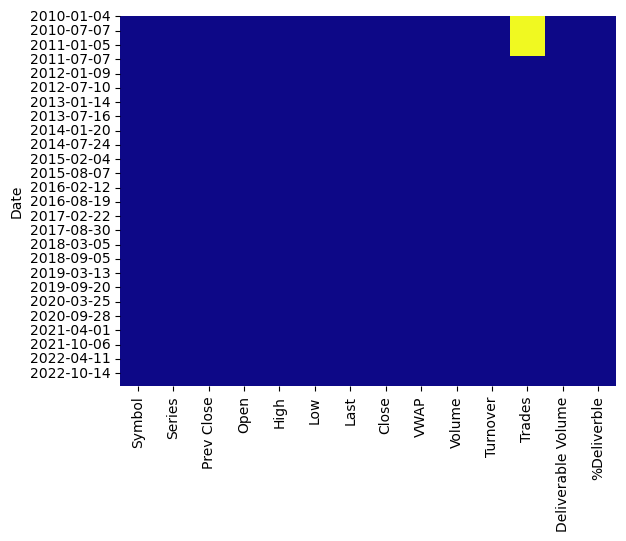

In [9]:
#visualising null values using heat map
sns.heatmap(data=tcs.isnull(), cmap='plasma', cbar=False);

In [10]:
#fill null values with previous values
tcs['Trades']=tcs['Trades'].fillna(method='bfill')

In [11]:
#checking number of null values
tcs.isnull().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

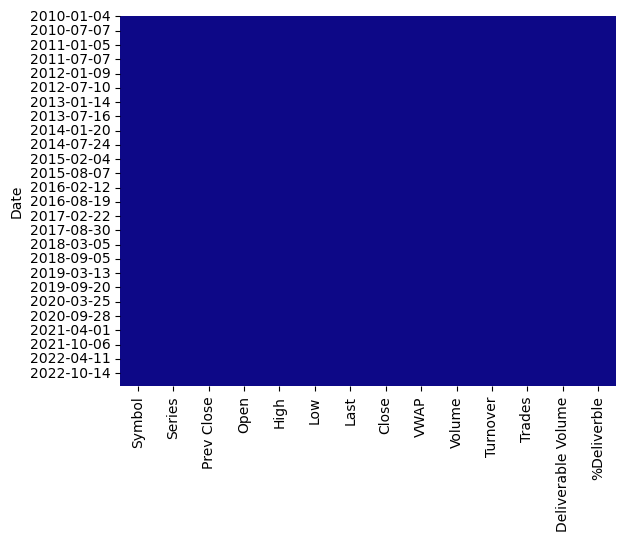

In [12]:
#visualising null values using heatmap
sns.heatmap(data=tcs.isnull(), cmap='plasma', cbar=False);

In [13]:
#checking for duplicate values
tcs.duplicated().sum()

3

In [14]:
#droping duplicates
tcs.drop_duplicates(inplace=True)

In [15]:
#checking duplicate values
tcs.duplicated().sum()

0

In [16]:
#since 'Symbol' and 'Series' is constant value we can drop it
tcs.drop(['Symbol','Series'],axis=1,inplace=True)

In [17]:
tcs.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,
2010-01-04,750.25,754.80,758.90,749.05,752.25,751.65,753.34,981841,7.396555e+13,24427.0,570284,0.5808
2010-01-05,751.65,755.00,759.55,746.55,748.70,751.85,751.53,1007244,7.569694e+13,24427.0,513287,0.5096
2010-01-06,751.85,751.85,752.20,733.00,737.00,734.85,738.35,1674588,1.236424e+14,24427.0,1010023,0.6031
2010-01-07,734.85,735.50,739.40,711.00,711.85,714.40,717.63,3237446,2.323275e+14,24427.0,1987073,0.6138
2010-01-08,714.40,716.00,718.50,696.50,696.50,699.80,704.68,3024089,2.131008e+14,24427.0,1944945,0.6432


# EDA & Feature Engineering

<AxesSubplot:>

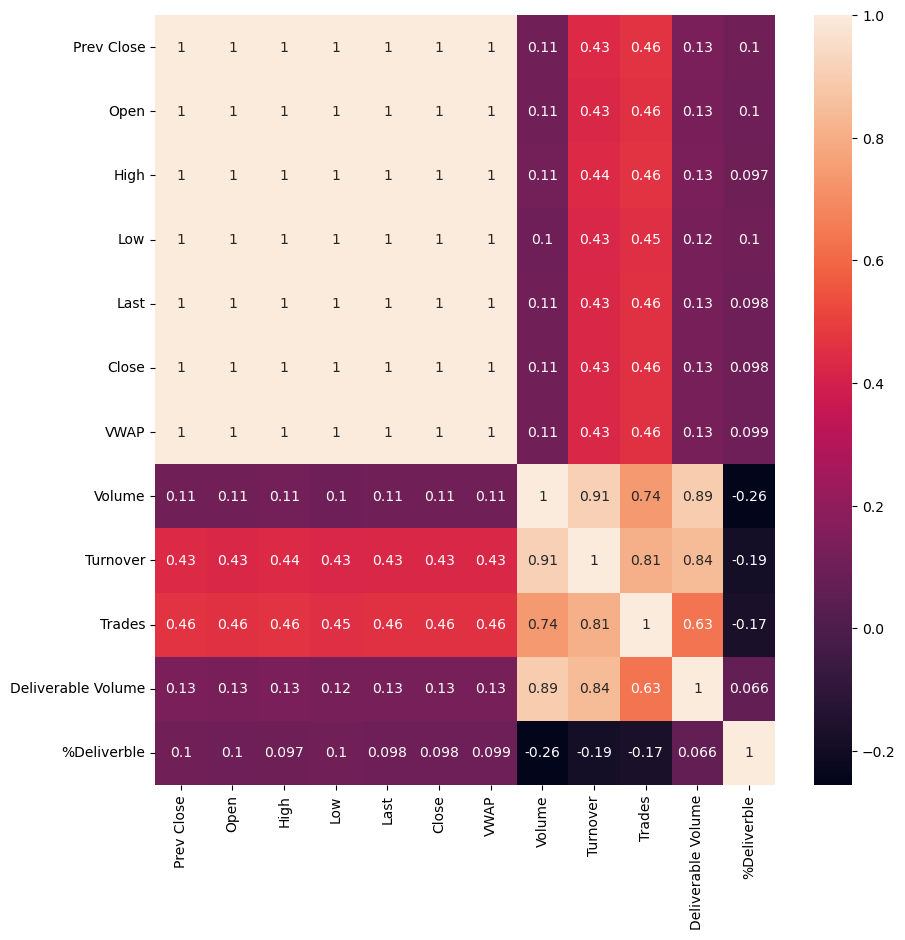

In [18]:
#visualising corelation using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(tcs.corr(),annot=True)

we observe from scatter plot and heat map

1.Prev Close,open,High,Low,Last,Close,VWAP is higly co related with each other.

2.Volume is highly corelated with Turnover,Deliverable Volume.

3.Trades is moderatly co related with volume,Turnover,Deliverable volume.

4.Deliverable Volume is highly co related with Volume,Turnover and moderatly with Trades.

5.%Deliverable Volume is moderatly co related with Deliverable Volume

In [19]:
#we are considering columns 
tcs=tcs[['Open','High','Low','Close']]

In [20]:
#first 5 values
tcs.head()

,Open,High,Low,Close
Date,,,,
2010-01-04,754.80,758.90,749.05,751.65
2010-01-05,755.00,759.55,746.55,751.85
2010-01-06,751.85,752.20,733.00,734.85
2010-01-07,735.50,739.40,711.00,714.40
2010-01-08,716.00,718.50,696.50,699.80


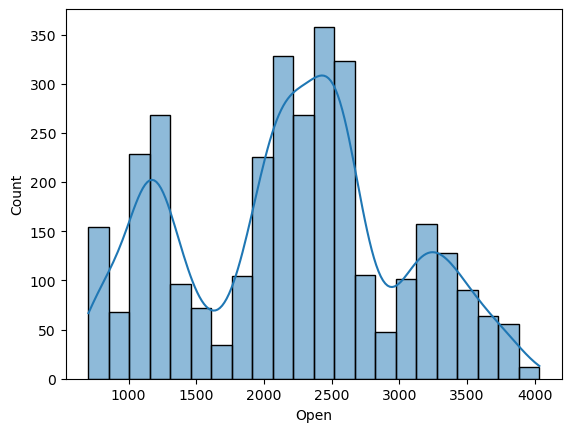

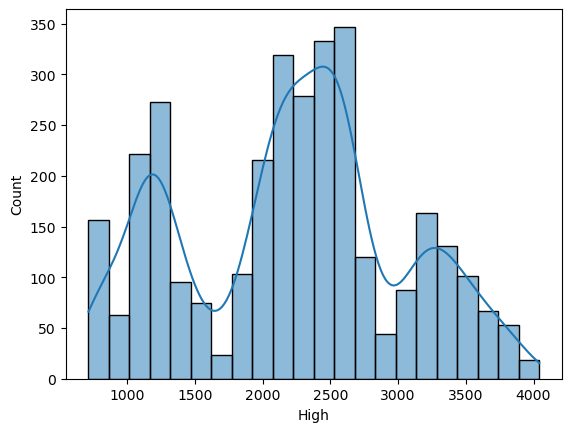

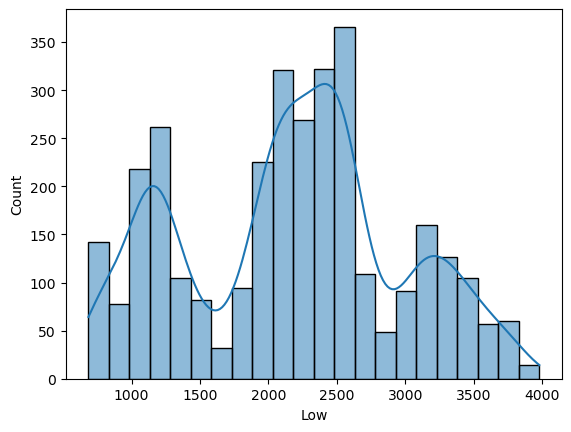

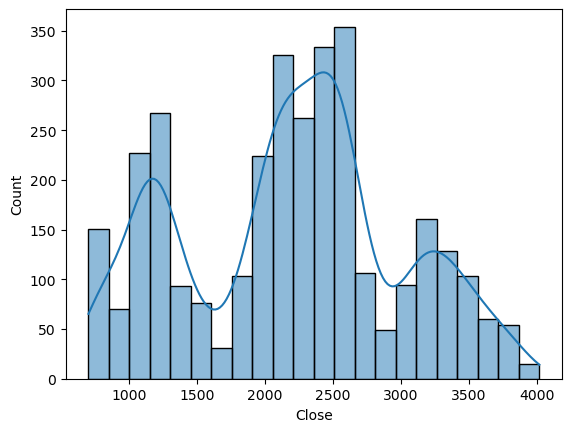

In [21]:
#plotting histplot for each feature
for i in tcs.columns:
    sns.histplot(tcs[i],kde=True)
    plt.show()

Open,High,Low,Close is not normally distributed.


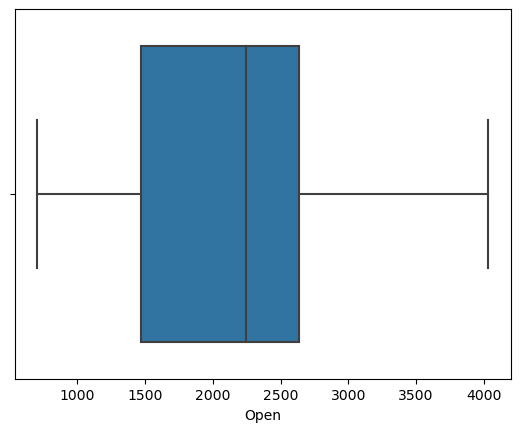

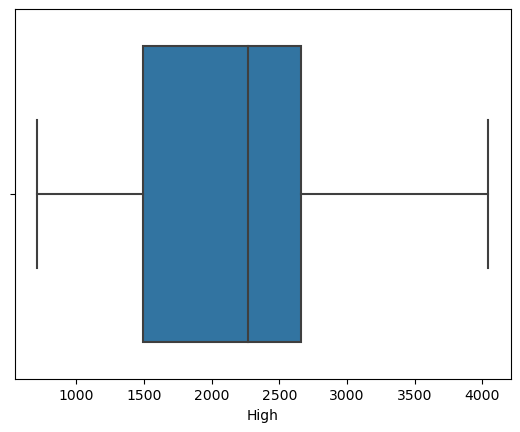

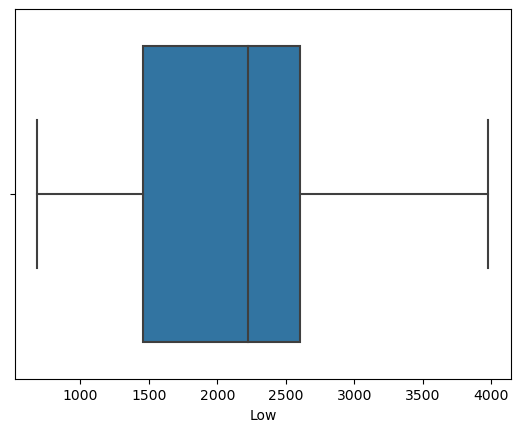

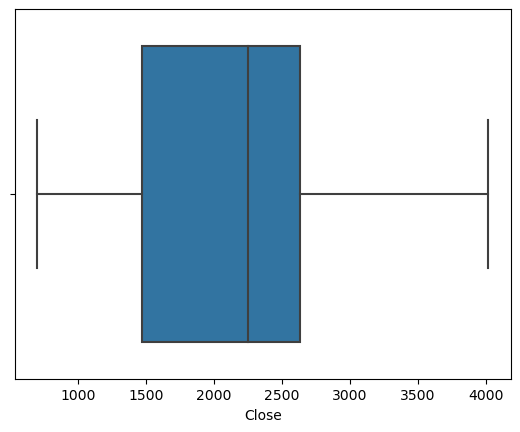

In [22]:
#plotting boxplot for each feature
for i in tcs.columns:
        sns.boxplot(tcs[i])
        plt.xlabel(i)
        plt.show()

There are no outliers in Open,High,Low,Close.

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

<Figure size 1000x1000 with 0 Axes>

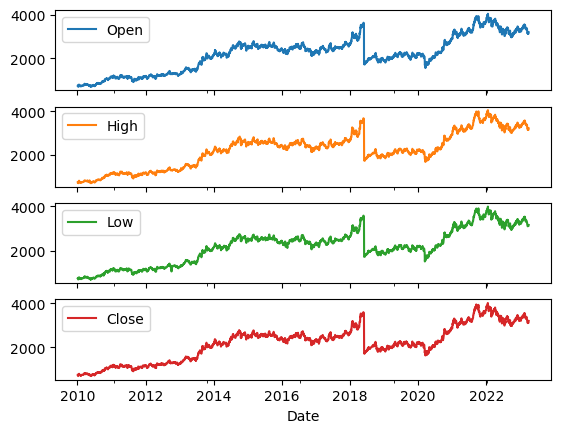

In [23]:
#lineplot for each feature
plt.figure(figsize=(10,10))
tcs.plot(subplots=True)

In Open,High,Low,Close we can see trend is increasing over the time.

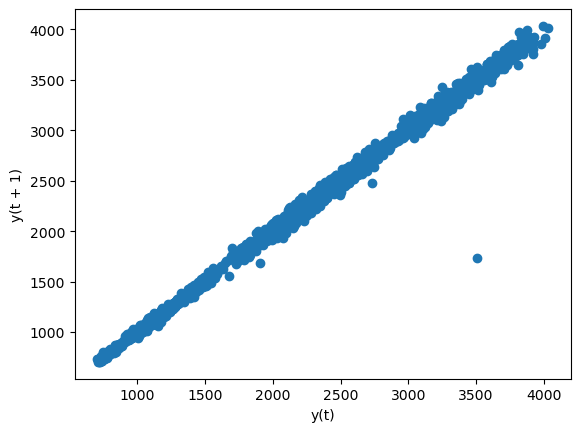

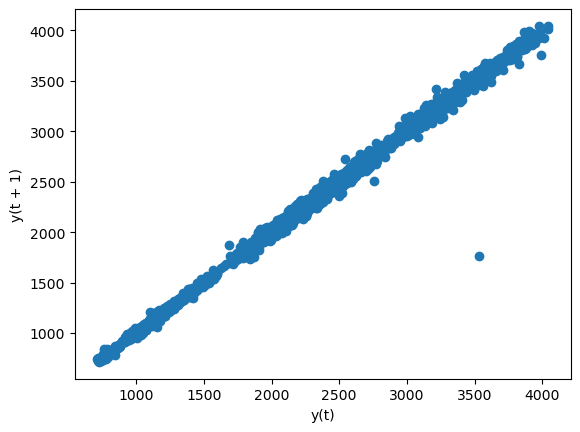

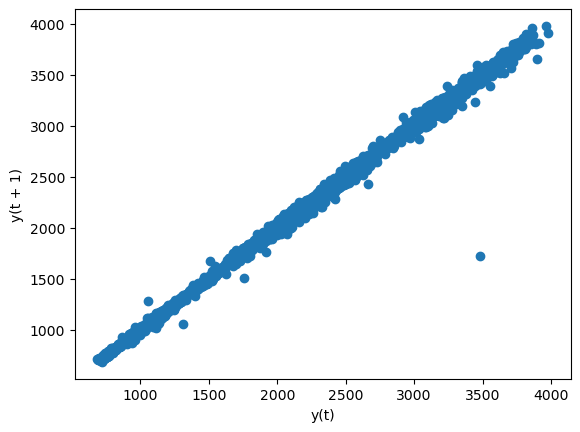

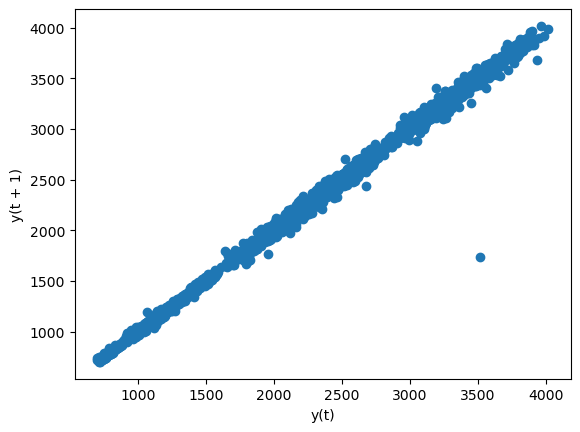

In [24]:
#lagplotfunction generates a scatter plot of each data point against its lagged value 
from pandas.plotting import lag_plot
for i in tcs.columns:
    lag_plot(tcs[i])
    plt.show()

From lag_plot,we can visualize the autocorrelation structure of the time series data.
1. In Open,High,Low,Close feature it suggests a strong positive autocorrelation.

### Time series decomposition plot

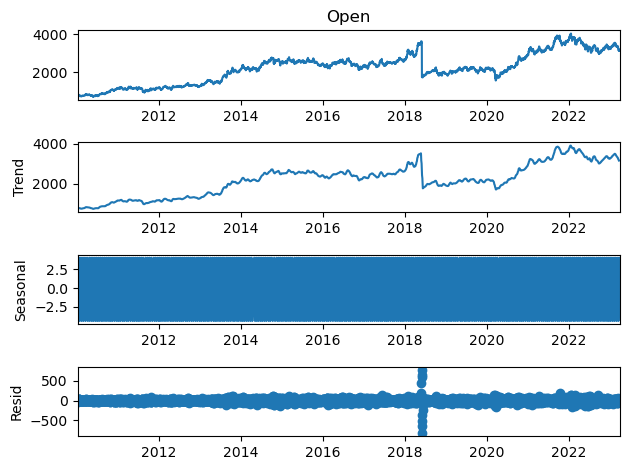

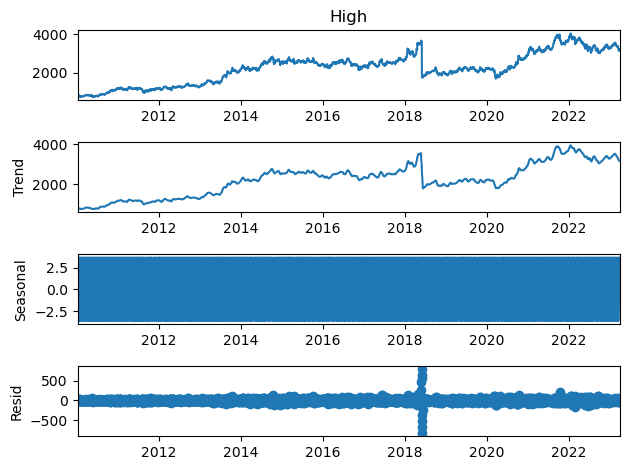

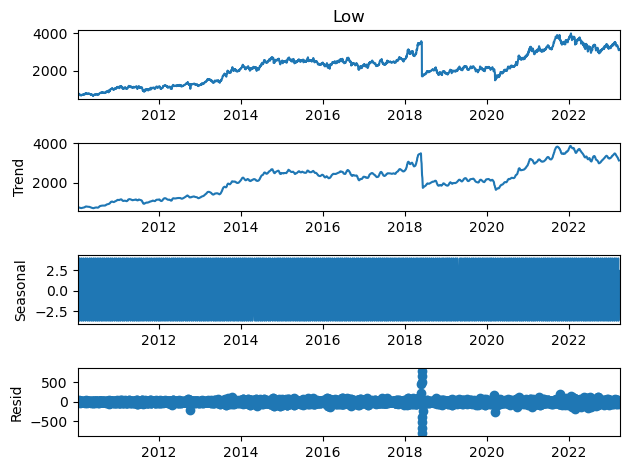

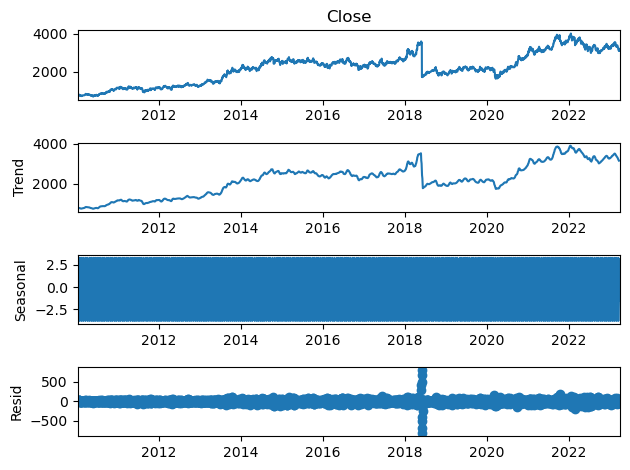

In [25]:
#decompose a time series into its constituent parts: trend, seasonal, and residual
from statsmodels.tsa.seasonal import seasonal_decompose
for i in tcs.columns:
    decompose_ts_add = seasonal_decompose(tcs[i],period=12) 
    decompose_ts_add.plot()
    plt.show()

## Pre-Processing

### Checking stationarity of data

### Performing agumented dicky fuller  test

At 95% confidence interval 

1)if p-value < .05 data is stationary

2)if p-value > .05 data is not stationary

In [26]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries): #defining function 
    rolmean=timeseries.rolling(120).mean() #rolling mean with window size as 120
    rolstd=timeseries.rolling(120).std() #rolling standard with window size as 120
    #plotting rolling mean and rolling std
    plt.figure(figsize=(18,10))
    plt.grid('both')
    plt.plot(timeseries)
    plt.plot(rolmean,label='rol_mean')
    plt.plot(rolstd,label='rol_std')
    plt.ylabel(i)
    plt.xlabel('year')
    plt.legend()
    plt.show()
    
    print('Result of Dickey-fuller test')
    dftest=adfuller(timeseries,autolag='AIC') #optimal lag length for the test using the Akaike Information Criterion (AIC)
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','lags used','Number of Observed ']) #taking first 4 values and creating labels on index position
    for key,value in dftest[4].items():
        dfoutput['Confidence Interval (%s)'%key]=value #''%s' is used to insert value of 'key' into string
    print(dfoutput)
    print('--------------------------------')

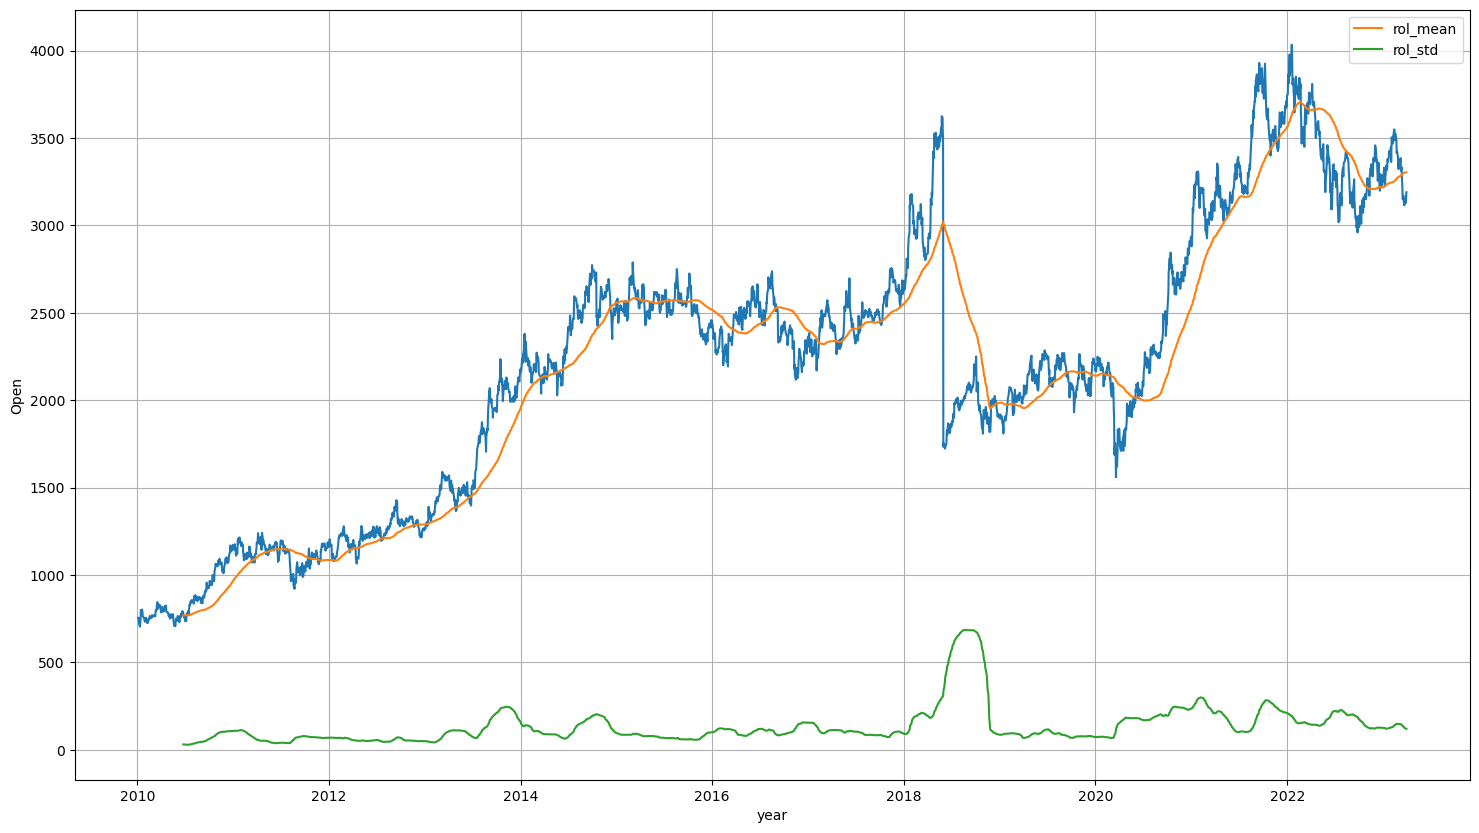

Result of Dickey-fuller test
Test Statistic                 -1.946065
p-value                         0.310711
lags used                       0.000000
Number of Observed           3287.000000
Confidence Interval (1%)       -3.432341
Confidence Interval (5%)       -2.862420
Confidence Interval (10%)      -2.567238
dtype: float64
--------------------------------


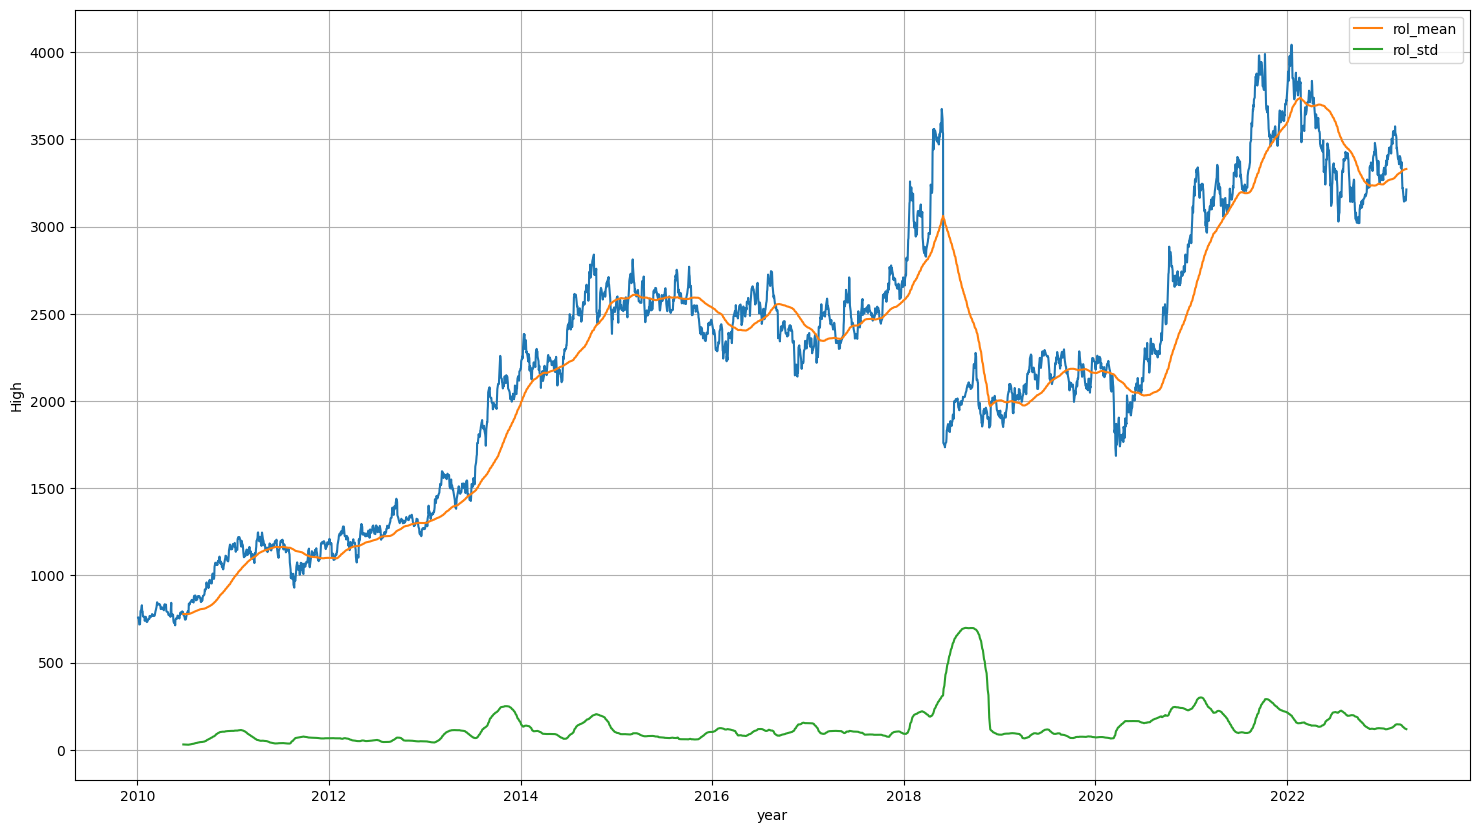

Result of Dickey-fuller test
Test Statistic                 -1.925488
p-value                         0.320167
lags used                       1.000000
Number of Observed           3286.000000
Confidence Interval (1%)       -3.432342
Confidence Interval (5%)       -2.862420
Confidence Interval (10%)      -2.567238
dtype: float64
--------------------------------


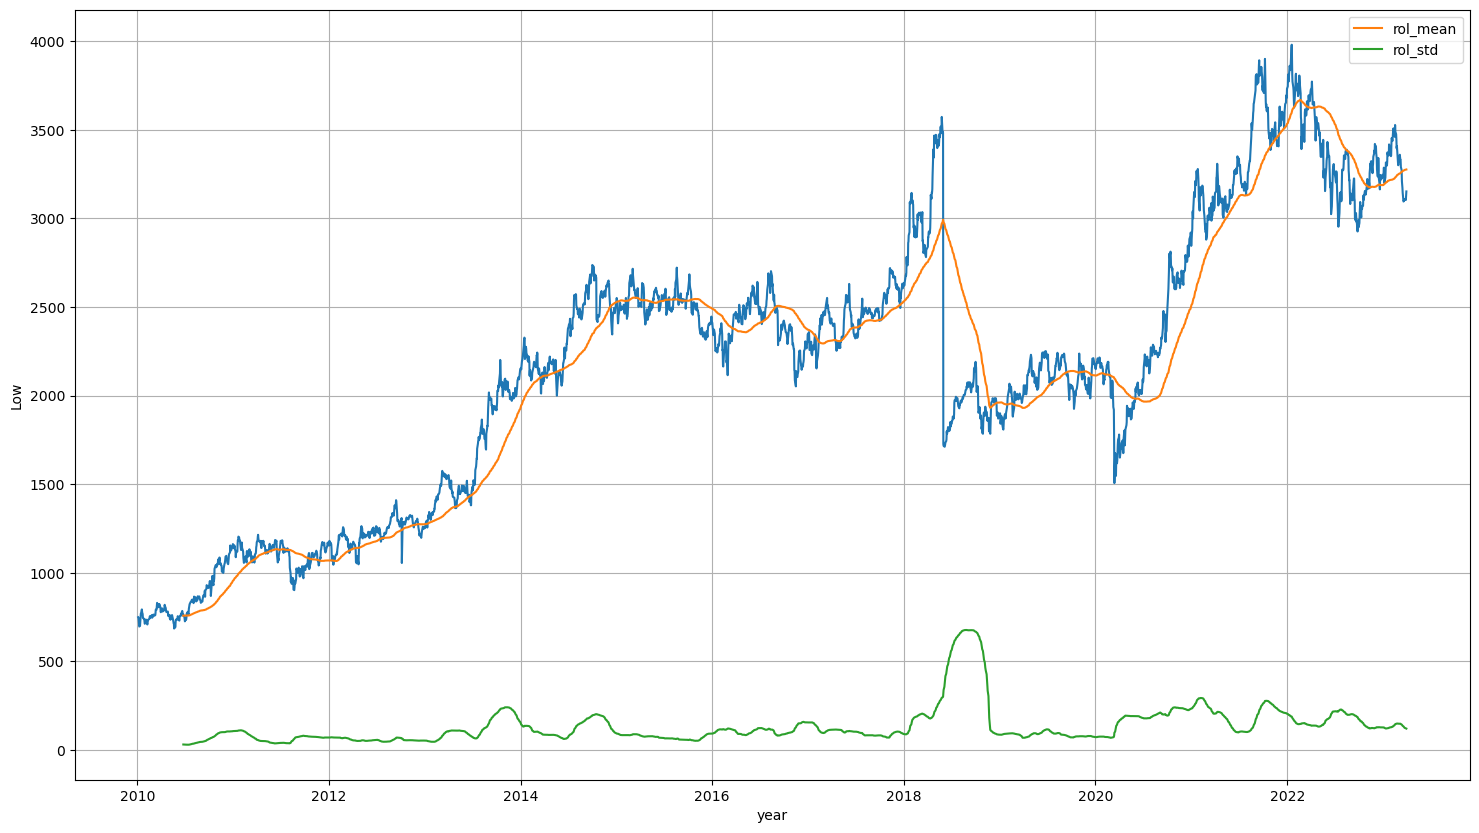

Result of Dickey-fuller test
Test Statistic                 -1.946544
p-value                         0.310492
lags used                       1.000000
Number of Observed           3286.000000
Confidence Interval (1%)       -3.432342
Confidence Interval (5%)       -2.862420
Confidence Interval (10%)      -2.567238
dtype: float64
--------------------------------


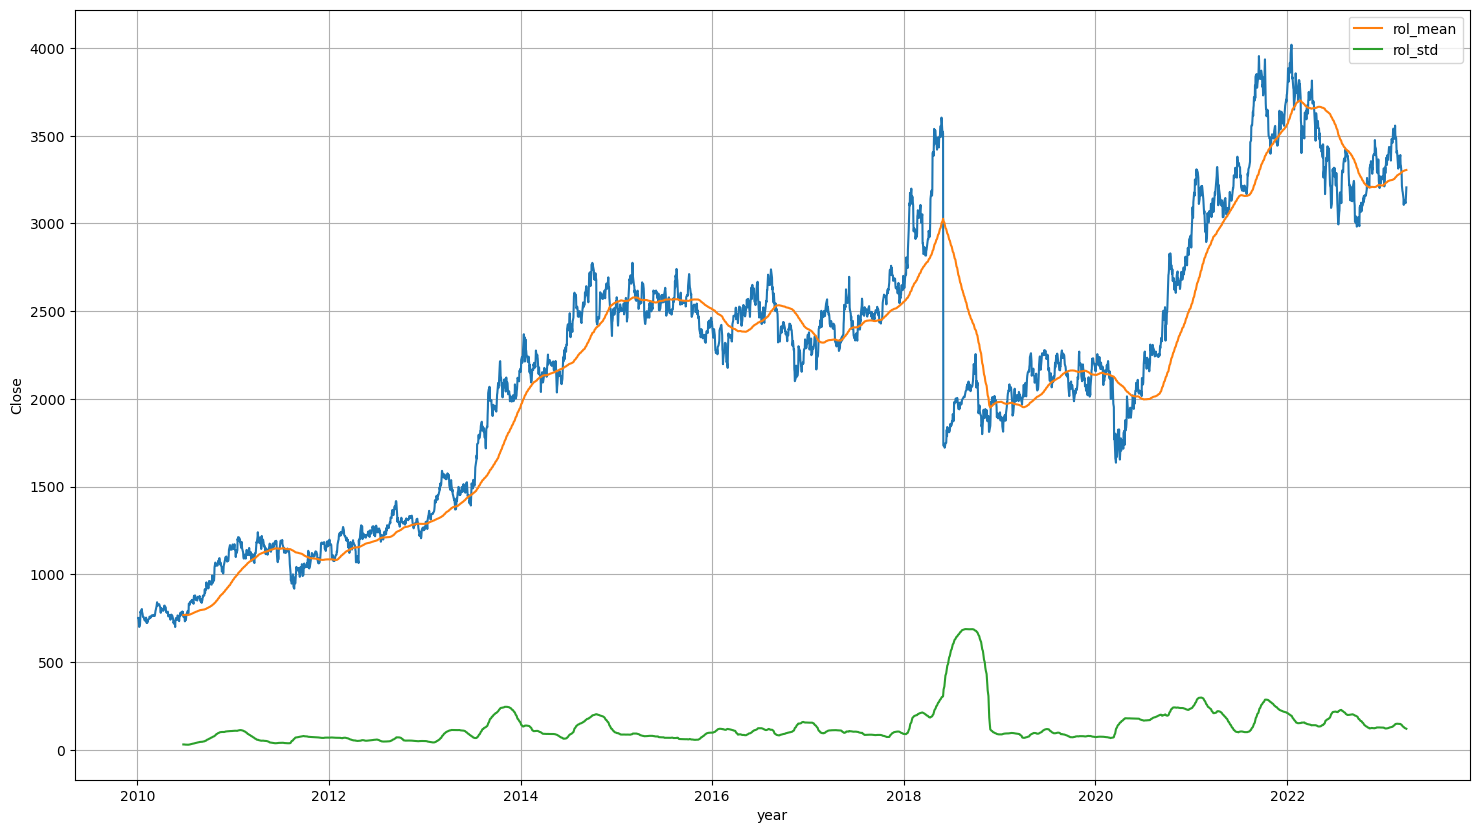

Result of Dickey-fuller test
Test Statistic                 -1.930009
p-value                         0.318078
lags used                       0.000000
Number of Observed           3287.000000
Confidence Interval (1%)       -3.432341
Confidence Interval (5%)       -2.862420
Confidence Interval (10%)      -2.567238
dtype: float64
--------------------------------


In [27]:
#line plot for ecah feature
for i in tcs.columns:
    data=tcs[i]
    test_stationary(data)

Since p-value is more than .05.Data is not stationary

In [28]:
#Scaling data from 0 to 1
scaler = MinMaxScaler() #calling minmaxscaler
scaled_data = scaler.fit_transform(tcs) #training and transforming scaled data

## Train and Test data

In [29]:
train_size = int(len(scaled_data) * 0.8) #considering 80% length scaled as train size
test_size = len(scaled_data) - train_size #remaining  20% length as test size
train_data = scaled_data[0:train_size,:] #two-dimensional numpy array that contains the scaled training data
test_data = scaled_data[train_size:len(scaled_data),:] ##two-dimensional numpy array that contains the scaled test data

In [30]:
train_data

array([[0.01525548, 0.01348753, 0.01936414, 0.01569466],
       [0.01531555, 0.01368279, 0.01860536, 0.01575491],
       [0.01436959, 0.01147492, 0.01449275, 0.01063381],
       ...,
       [0.47177886, 0.48227696, 0.47958115, 0.48456139],
       [0.48168891, 0.48483028, 0.48615221, 0.48072057],
       [0.48469196, 0.48392911, 0.48282874, 0.47693999]])

In [31]:
test_data

array([[0.47418129, 0.48002403, 0.48269216, 0.47606639],
       [0.47578792, 0.47533794, 0.4738751 , 0.46927341],
       [0.47117825, 0.47641935, 0.47507398, 0.46839981],
       ...,
       [0.72763855, 0.7316161 , 0.73598907, 0.72790396],
       [0.72823916, 0.73175128, 0.73415282, 0.73483251],
       [0.74654274, 0.75067588, 0.7486911 , 0.75501566]])

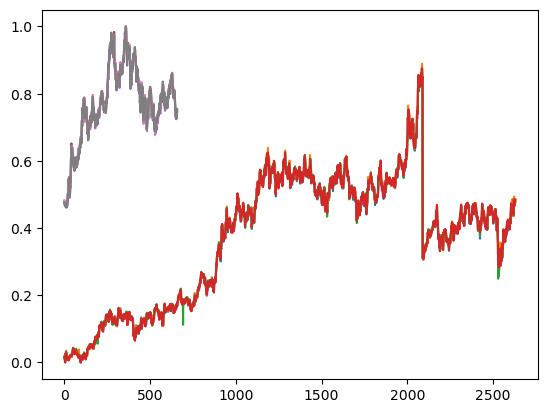

In [32]:
#plotting scaled train and test data
plt.plot(train_data)
plt.plot(test_data)
plt.show()

In [33]:
#create_dataset function to generate the input-output pairs
def create_dataset(data, time_step=1): #function take 2 arguments
    X_data, y_data = [], []  #creating empty list to store imput-output pairs
    for i in range(len(data)-time_step): #iterates first to last row index
        X_data.append(data[i:(i+time_step), :]) #slice of data array is taken from index i to i+time_step and appending it
        y_data.append(data[i+time_step, :]) #extracted from data array by taking row index i+time_step 
    return np.array(X_data), np.array(y_data) #input data is stored in X_data and output data is stored in y_data


In [34]:
time_step = 60 #60 consecutive values
X_train, y_train = create_dataset(train_data, time_step) #X_train will have input sequence and y_train will have output values
X_test, y_test = create_dataset(test_data, time_step) #X_test will have input sequence and y_test will have output values


## Model Building

### LTSM(Long Short-Term Memory) MODEL

In [35]:
model = Sequential() #calling sequential model
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 4))) #50 memory units,timestep is no of steps & 4 is number of columns
model.add(LSTM(50, return_sequences=True)) #return sequences parameter controls whether output of LSTM layer should be is sequence or single output
model.add(LSTM(50)) #return_sequence is set to False,to return output of the last time step
model.add(Dense(4)) #dense layer with 4 output units.dense layer applies linear transformation

In [36]:
model.compile(loss='mean_squared_error', optimizer='adam') #MSE commonly used in regression task,adam is more efficient than tradional stochastic gradient decent
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1) #epochs no of training times,batch size no of samples,A value of 0 means no logging, 1 means logging progress for each epoch, and 2 means logging progress for each batch


Epoch 1/100
41/41 [==============================] - 10s 89ms/step - loss: 0.0196
Epoch 2/100
41/41 [==============================] - 3s 75ms/step - loss: 0.0019
Epoch 3/100
41/41 [==============================] - 3s 77ms/step - loss: 0.0016
Epoch 4/100
41/41 [==============================] - 3s 77ms/step - loss: 0.0015
Epoch 5/100
41/41 [==============================] - 3s 71ms/step - loss: 0.0015
Epoch 6/100
41/41 [==============================] - 3s 74ms/step - loss: 0.0015
Epoch 7/100
41/41 [==============================] - 3s 70ms/step - loss: 0.0013
Epoch 8/100
41/41 [==============================] - 3s 74ms/step - loss: 0.0012
Epoch 9/100
41/41 [==============================] - 3s 74ms/step - loss: 0.0011
Epoch 10/100
41/41 [==============================] - 3s 73ms/step - loss: 0.0011
Epoch 11/100
41/41 [==============================] - 3s 76ms/step - loss: 0.0010
Epoch 12/100
41/41 [==============================] - 3s 77ms/step - loss: 9.2352e-04
Epoch 13/100
41/41 [

In [37]:
#predicting on X_test
predictions = model.predict(X_test)

19/19 [==============================] - 1s 18ms/step


In [38]:
# transforming scaled value to actual value of predictions
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

In [39]:
#printing
predictions

array([[2628.3557, 2650.62  , 2580.076 , 2616.7336],
       [2654.8223, 2677.0332, 2607.2786, 2644.2224],
       [2687.9087, 2710.5742, 2639.8726, 2678.363 ],
       ...,
       [3130.566 , 3100.138 , 3056.7185, 3136.7834],
       [3126.8372, 3097.8347, 3053.641 , 3133.0332],
       [3136.284 , 3109.3245, 3064.3574, 3143.4077]], dtype=float32)

In [40]:
#printing
y_test

array([[2610.  , 2721.85, 2610.  , 2653.15],
       [2685.  , 2710.  , 2667.  , 2685.7 ],
       [2699.  , 2713.25, 2681.3 , 2707.45],
       ...,
       [3127.  , 3149.55, 3110.15, 3115.9 ],
       [3129.  , 3150.  , 3104.1 , 3138.9 ],
       [3189.95, 3213.  , 3152.  , 3205.9 ]])

In [41]:
#applying Root Mean Square Error to check performance(average difference between actual and predicted)
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
print('RMSE:', rmse)

RMSE: 70.56101562517588


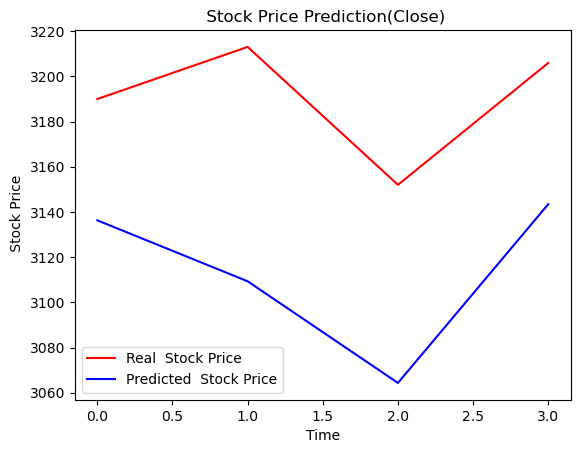

In [42]:
#Line plot for actual and predicted stock price
plt.plot(y_test[-1], color = 'red', label = 'Real  Stock Price')
plt.plot(predictions[-1], color = 'blue', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction(Close)')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [43]:
#selecting path of file location to be saved
import os
os.chdir(r'C:\Users\harsh\Downloads\LSTM')

In [44]:
import pickle
filename='trained_model.sav' #filename
pickle.dump(model,open(filename,'wb')) #saving model with file name in write bytes mode

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...layers\lstm_2
......vars
...layers\lstm_2\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-03-31 22:23:06         3463
metadata.json                                  2023-03-31 22:23:06      

In [45]:
#loading saved model in read bytes mode
loaded_model=pickle.load(open('trained_model.sav','rb'))

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-03-31 22:23:06         3463
metadata.json                                  2023-03-31 22:23:06           64
variables.h5                                   2023-03-31 22:23:06       652912
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...layers\lstm_2
......vars
...layers\lstm_2\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
........

In [46]:
n_future = 30  # Number of days to forecast
n_past = 60    #Past 60 days

In [47]:
last_30_days = scaled_data[-n_past:] #uses 60 days as input data (60, 4)
X_test = np.array([last_30_days]) #reshaping data (1, 60, 4) as model excepts 3D array
predictions = [] #creating empty list

for i in range(n_future): #range of 30 days
    next_day_pred = loaded_model.predict(X_test)[0, 0] #this line uses to predict next 30 days
    last_30_days = np.append(last_30_days[1:, :], [[next_day_pred, next_day_pred, next_day_pred, next_day_pred]], axis=0) # first 29 values in array are shifted down by one index and predicted value is added to end of array 
    X_test = np.array([last_30_days])  #reshaping data (1, 60, 4)
    pred_value = scaler.inverse_transform([[0, 0, 0, next_day_pred]])[0, 3] #setting first 3 values to zero and transforming the last value
    predictions.append(pred_value) #appending to the list
    print("Day {}: {}".format(i+1, pred_value)) #printing day wise


1/1 [==============================] - 1s 1s/step
Day 1: 3189.229224324227
1/1 [==============================] - 0s 31ms/step
Day 2: 3176.9240883588795
1/1 [==============================] - 0s 27ms/step
Day 3: 3159.676518058777
1/1 [==============================] - 0s 29ms/step
Day 4: 3141.6752853870394
1/1 [==============================] - 0s 27ms/step
Day 5: 3124.749639129639
1/1 [==============================] - 0s 27ms/step
Day 6: 3109.84081633091
1/1 [==============================] - 0s 26ms/step
Day 7: 3097.288548755646
1/1 [==============================] - 0s 26ms/step
Day 8: 3087.0641461849214
1/1 [==============================] - 0s 25ms/step
Day 9: 3078.914541101456
1/1 [==============================] - 0s 23ms/step
Day 10: 3072.4855576992036
1/1 [==============================] - 0s 24ms/step
Day 11: 3067.372960686684
1/1 [==============================] - 0s 29ms/step
Day 12: 3063.1760763168336
1/1 [==============================] - 0s 27ms/step
Day 13: 3059.526284

In [48]:
df=pd.DataFrame(predictions,columns=['Close']) #creating data frame
df=df.reset_index().rename(columns={'index': 'Days'}) #Resetting the index of the DataFrame and renaming the index column as "days"
df['Days']=df['Days'] + 1 # Adding 1 to the "days" index column to start from 1

In [49]:
df = df.set_index(df.columns[0]) #setting indeX column as Days
df

,Close
Days,
1,3189.229224
2,3176.924088
3,3159.676518
4,3141.675285
5,3124.749639
6,3109.840816
7,3097.288549
8,3087.064146
9,3078.914541


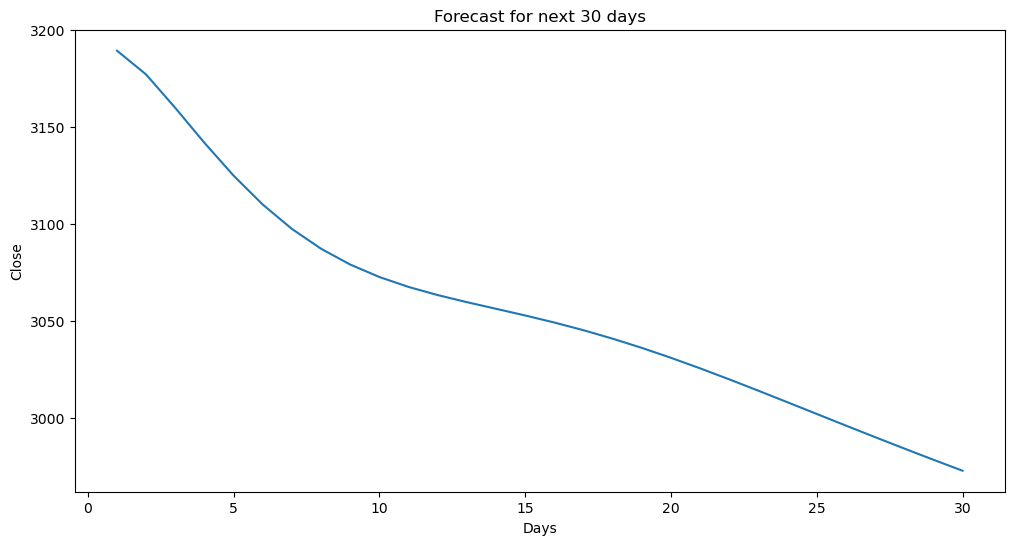

In [50]:
#line plot
fig1=plt.figure(figsize=(12,6))
plt.plot(df)
plt.title(f'Forecast for next {n_future} days')
plt.ylabel('Close')
plt.xlabel('Days')
plt.show()